In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kmedoids
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df1 = pd.read_csv("Atmospheric Data Cleaned Instances Per Day.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df1.head()

,Year,Month,Day,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot
0,2023,5,1,42.098597,2.377042,0.378701,0.269903,32.476493,20.131194,19.830514,29.753889,2.439608,154.966895,804.314569,630.264466,0.0
1,2023,5,2,44.560389,1.889646,0.215486,0.244556,28.960708,18.765649,20.916111,27.642535,2.883990,231.153622,803.925649,659.373538,0.0
2,2023,5,3,50.777618,4.491722,0.745514,0.397743,49.597222,35.021854,21.357729,30.954847,1.604234,178.251752,803.767500,485.725435,0.0
3,2023,5,4,50.881806,4.101944,0.455646,0.384681,48.555437,35.872396,21.968729,35.661208,1.729689,183.150144,804.870299,422.336301,0.0
4,2023,5,5,52.673167,4.675542,0.458521,0.442660,52.817632,41.230729,21.668757,42.649750,1.900280,137.419527,805.930109,449.436559,0.2


In [5]:
df1.drop(["Year", "Month", "Day"], axis=1, inplace=True)

In [6]:
df1.head()

,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot
0,42.098597,2.377042,0.378701,0.269903,32.476493,20.131194,19.830514,29.753889,2.439608,154.966895,804.314569,630.264466,0.0
1,44.560389,1.889646,0.215486,0.244556,28.960708,18.765649,20.916111,27.642535,2.883990,231.153622,803.925649,659.373538,0.0
2,50.777618,4.491722,0.745514,0.397743,49.597222,35.021854,21.357729,30.954847,1.604234,178.251752,803.767500,485.725435,0.0
3,50.881806,4.101944,0.455646,0.384681,48.555437,35.872396,21.968729,35.661208,1.729689,183.150144,804.870299,422.336301,0.0
4,52.673167,4.675542,0.458521,0.442660,52.817632,41.230729,21.668757,42.649750,1.900280,137.419527,805.930109,449.436559,0.2


In [7]:
ss = StandardScaler()
X_ss = ss.fit_transform(df1)
df_ss = pd.DataFrame(X_ss, columns=df1.columns)
df_ss.head()

,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot
0,0.802358,-1.231678,-0.678739,-0.590265,0.729599,0.338225,0.516847,-1.937073,1.615577,0.327731,-1.068511,1.331083,-0.353445
1,1.047696,-1.475738,-0.919847,-0.835044,0.407410,0.164196,0.882199,-2.068812,2.421619,2.737093,-1.343043,1.570084,-0.353445
2,1.667294,-0.172765,-0.136869,0.644294,2.298555,2.235927,1.030824,-1.862139,0.100333,1.064102,-1.454678,0.144340,-0.353445
3,1.677677,-0.367944,-0.565073,0.518149,2.203085,2.344322,1.236453,-1.568483,0.327889,1.219010,-0.676230,-0.376119,-0.353445
4,1.856201,-0.080719,-0.560826,1.078057,2.593676,3.027201,1.135499,-1.132429,0.637315,-0.227195,0.071874,-0.153611,-0.304880


In [8]:
df_ss.shape

(315, 13)

In [9]:
df1.shape

(315, 13)

# Clustering jerárquico

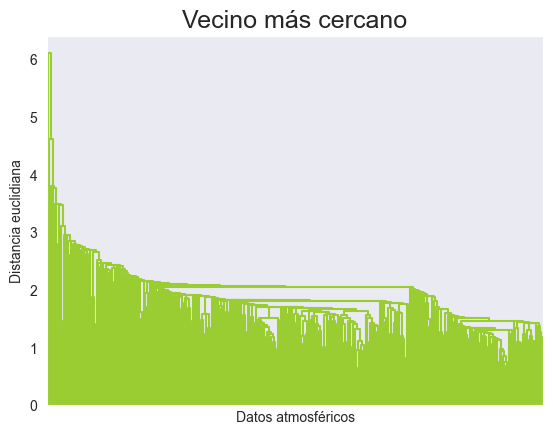

In [10]:
sns.set_style("dark")
Z = linkage(df_ss, method="single", metric='euclidean')
fig, ax = plt.subplots()
plt.title("Vecino más cercano", fontsize=18)
dendrogram(Z, color_threshold=0, link_color_func=lambda x:"yellowgreen", no_labels=True)
ax.set_ylabel("Distancia euclidiana")
ax.set_xlabel("Datos atmosféricos")
plt.show()

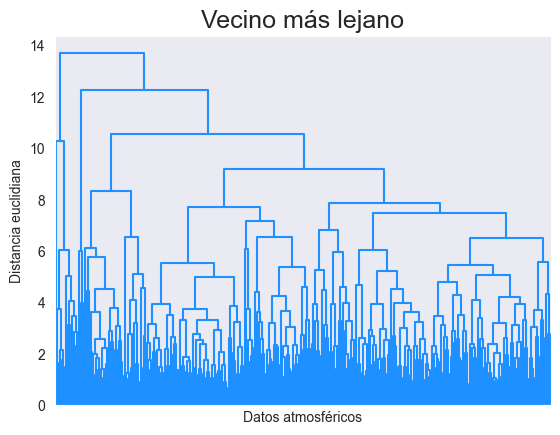

In [11]:
sns.set_style("dark")
Z = linkage(df_ss, method="complete", metric='euclidean')
fig, ax = plt.subplots()
plt.title("Vecino más lejano", fontsize=18)
dendrogram(Z, color_threshold=0, link_color_func=lambda x:"dodgerblue", no_labels=True)
ax.set_ylabel("Distancia euclidiana")
ax.set_xlabel("Datos atmosféricos")
plt.show()

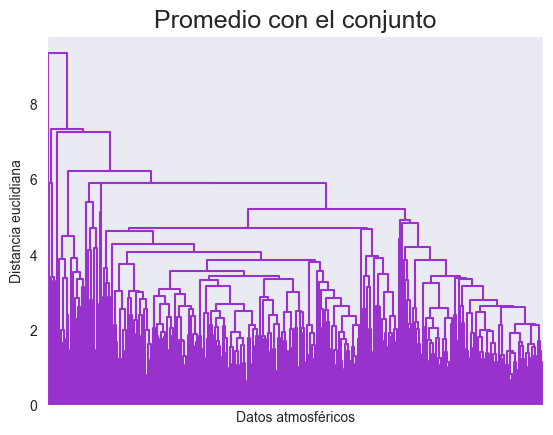

In [12]:
sns.set_style("dark")
Z = linkage(df_ss, method="average", metric='euclidean')
fig, ax = plt.subplots()
plt.title("Promedio con el conjunto", fontsize=18)
dendrogram(Z, color_threshold=0, link_color_func=lambda x:"darkorchid", no_labels=True)
ax.set_ylabel("Distancia euclidiana")
ax.set_xlabel("Datos atmosféricos")
plt.show()

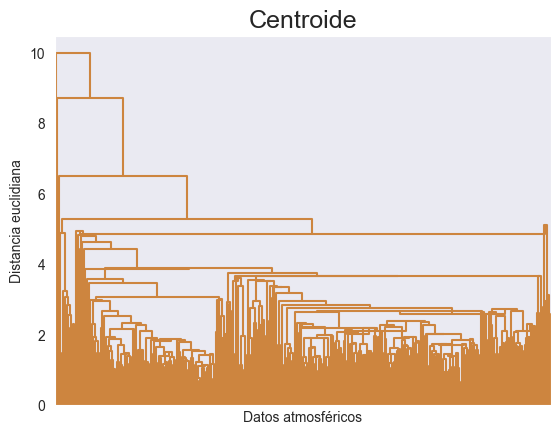

In [13]:
sns.set_style("dark")
Z = linkage(df_ss, method="centroid", metric='euclidean')
fig, ax = plt.subplots()
plt.title("Centroide", fontsize=18)
dendrogram(Z, color_threshold=0, link_color_func=lambda x:"peru", no_labels=True)
ax.set_ylabel("Distancia euclidiana")
ax.set_xlabel("Datos atmosféricos")
plt.show()

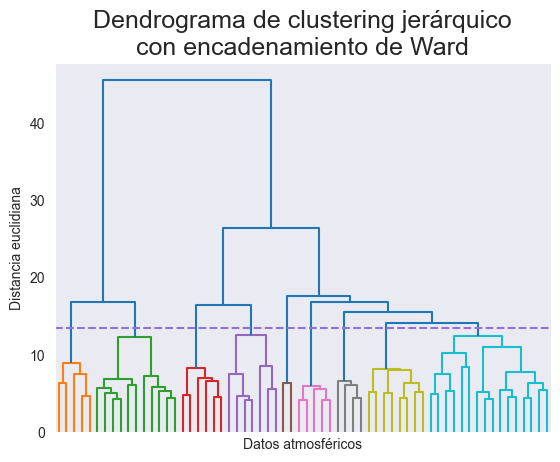

In [14]:
sns.set_style("dark")
Z = linkage(df_ss, method="ward", metric='euclidean')
fig, ax = plt.subplots()
plt.title("Dendrograma de clustering jerárquico\ncon encadenamiento de Ward", fontsize=18)
dendrogram(Z, p=64, truncate_mode="lastp", color_threshold=13.5, no_labels=True)
plt.axhline(y=13.5, color='mediumpurple', linestyle='--')
ax.set_ylabel("Distancia euclidiana")
ax.set_xlabel("Datos atmosféricos")
plt.show()

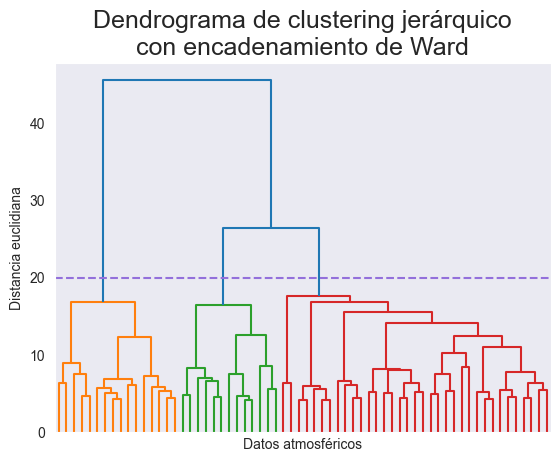

In [15]:
sns.set_style("dark")
Z = linkage(df_ss, method="ward", metric='euclidean')
fig, ax = plt.subplots()
plt.title("Dendrograma de clustering jerárquico\ncon encadenamiento de Ward", fontsize=18)
dendrogram(Z, p=64, truncate_mode="lastp", color_threshold=20, no_labels=True)
plt.axhline(y=20, color='mediumpurple', linestyle='--')
ax.set_ylabel("Distancia euclidiana")
ax.set_xlabel("Datos atmosféricos")
plt.show()

In [16]:
clustering_jerarquico1 = AgglomerativeClustering(n_clusters=9, linkage="ward").fit(df_ss)

In [17]:
clustering_jerarquico1.labels_

array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 3, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 7, 5, 5, 5, 5, 3, 3, 3, 3, 2, 0, 3, 3, 2, 3, 7, 3, 2, 5, 5,
       5, 3, 5, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 5, 2, 2, 7, 7, 2,
       3, 3, 3, 3, 3, 2, 2, 5, 5, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 3, 2, 2, 3, 8, 8, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 2, 6, 6, 6, 6, 6, 6, 2, 2, 3, 2,
       2, 2, 0, 6, 6, 6, 6, 6, 2, 2, 2, 0, 8, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 2, 2, 2, 8, 8, 0, 2, 0, 2, 2,
       2, 8, 8, 8, 8, 8, 2, 8, 8, 2, 8, 2, 2, 2, 2, 6, 6, 6, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 6, 6, 3, 3, 0,
       6, 6, 6, 6, 6, 6, 0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2,
       1, 1, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1,

In [18]:
df1["Clustering Jerarquico 9"] = clustering_jerarquico1.labels_

In [19]:
df1.head()

,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot,Clustering Jerarquico 9
0,42.098597,2.377042,0.378701,0.269903,32.476493,20.131194,19.830514,29.753889,2.439608,154.966895,804.314569,630.264466,0.0,4
1,44.560389,1.889646,0.215486,0.244556,28.960708,18.765649,20.916111,27.642535,2.883990,231.153622,803.925649,659.373538,0.0,1
2,50.777618,4.491722,0.745514,0.397743,49.597222,35.021854,21.357729,30.954847,1.604234,178.251752,803.767500,485.725435,0.0,1
3,50.881806,4.101944,0.455646,0.384681,48.555437,35.872396,21.968729,35.661208,1.729689,183.150144,804.870299,422.336301,0.0,1
4,52.673167,4.675542,0.458521,0.442660,52.817632,41.230729,21.668757,42.649750,1.900280,137.419527,805.930109,449.436559,0.2,1


In [20]:
clustering_jerarquico2 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(df_ss)
df1["Clustering Jerarquico 3"] = clustering_jerarquico2.labels_

In [21]:
df1.head()

,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot,Clustering Jerarquico 9,Clustering Jerarquico 3
0,42.098597,2.377042,0.378701,0.269903,32.476493,20.131194,19.830514,29.753889,2.439608,154.966895,804.314569,630.264466,0.0,4,1
1,44.560389,1.889646,0.215486,0.244556,28.960708,18.765649,20.916111,27.642535,2.883990,231.153622,803.925649,659.373538,0.0,1,1
2,50.777618,4.491722,0.745514,0.397743,49.597222,35.021854,21.357729,30.954847,1.604234,178.251752,803.767500,485.725435,0.0,1,1
3,50.881806,4.101944,0.455646,0.384681,48.555437,35.872396,21.968729,35.661208,1.729689,183.150144,804.870299,422.336301,0.0,1,1
4,52.673167,4.675542,0.458521,0.442660,52.817632,41.230729,21.668757,42.649750,1.900280,137.419527,805.930109,449.436559,0.2,1,1


# Clustering con centroides: Kmedoids

In [22]:
def buscar_k(df:pd.DataFrame, k_test:int):
    inercia = []
    for k in range(1, k_test+1):
        model = kmedoids.KMedoids(n_clusters=k, metric='euclidean', method='fasterpam')
        model.fit(df.values)
        inercia.append(model.inertia_)


    sns.set_style("darkgrid")
    fig, ax = plt.subplots()
    plt.title("Búsqueda del número de clusters con la inercia para KMedoids", fontsize=16)
    sns.scatterplot(x=range(1, k_test+1), y=inercia, color="seagreen")
    ax.set_xlabel("Número de clusters", fontsize=12)
    ax.set_ylabel("Inercia", fontsize=12)
    plt.show()

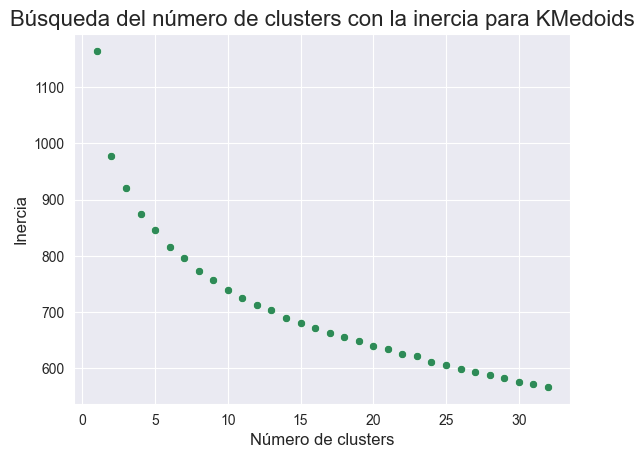

In [23]:
buscar_k(df_ss, 32)

In [24]:
def buscar_k_con_silhouette(df:pd.DataFrame, k_test:int):
    silhouette = []
    for k in range(2, k_test+1):
        model = kmedoids.KMedoids(n_clusters=k, metric='euclidean', method='fasterpam')
        model.fit(df.values)
        silhouette.append(silhouette_score(df.values, model.labels_, metric='euclidean'))


    sns.set_style("darkgrid")
    fig, ax = plt.subplots()
    plt.title("Búsqueda del número de clusters con el silhouette para KMedoids", fontsize=16)
    sns.scatterplot(x=range(2, k_test+1), y=silhouette, color="saddlebrown")
    ax.set_xlabel("Número de clusters", fontsize=12)
    ax.set_ylabel("Silhouette", fontsize=12)
    plt.show()

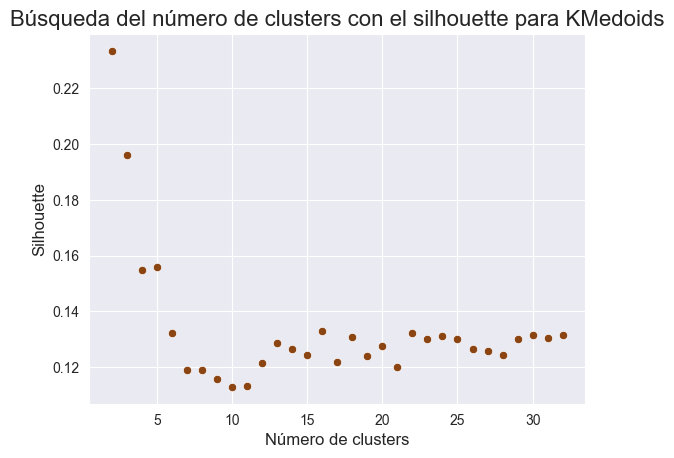

In [25]:
buscar_k_con_silhouette(df_ss, 32)

In [26]:
clustering_KMedoids_2 = kmedoids.KMedoids(n_clusters=2, metric='euclidean', method='fasterpam')
clustering_KMedoids_2.fit(df_ss.values)
df1["Clustering KMedoids 2"] = clustering_KMedoids_2.labels_

clustering_KMedoids_3 = kmedoids.KMedoids(n_clusters=3, metric='euclidean', method='fasterpam')
clustering_KMedoids_3.fit(df_ss.values)
df1["Clustering KMedoids 3"] = clustering_KMedoids_3.labels_
df1.head()

,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot,Clustering Jerarquico 9,Clustering Jerarquico 3,Clustering KMedoids 2,Clustering KMedoids 3
0,42.098597,2.377042,0.378701,0.269903,32.476493,20.131194,19.830514,29.753889,2.439608,154.966895,804.314569,630.264466,0.0,4,1,1,1
1,44.560389,1.889646,0.215486,0.244556,28.960708,18.765649,20.916111,27.642535,2.883990,231.153622,803.925649,659.373538,0.0,1,1,1,1
2,50.777618,4.491722,0.745514,0.397743,49.597222,35.021854,21.357729,30.954847,1.604234,178.251752,803.767500,485.725435,0.0,1,1,1,1
3,50.881806,4.101944,0.455646,0.384681,48.555437,35.872396,21.968729,35.661208,1.729689,183.150144,804.870299,422.336301,0.0,1,1,1,1
4,52.673167,4.675542,0.458521,0.442660,52.817632,41.230729,21.668757,42.649750,1.900280,137.419527,805.930109,449.436559,0.2,1,1,1,1


# DBSCAN

In [53]:
model_density = DBSCAN(eps=2, min_samples=8, metric='euclidean')
model_density.fit(df_ss.values)
model_density.labels_

array([ 0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1,
        0,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [54]:
df1["Clustering DBSCAN 2"] = clustering_KMedoids_3.labels_

In [55]:
df1.head()

,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot,Clustering Jerarquico 9,Clustering Jerarquico 3,Clustering KMedoids 2,Clustering KMedoids 3,Clustering DBSCAN 2
0,42.098597,2.377042,0.378701,0.269903,32.476493,20.131194,19.830514,29.753889,2.439608,154.966895,804.314569,630.264466,0.0,4,1,1,1,1
1,44.560389,1.889646,0.215486,0.244556,28.960708,18.765649,20.916111,27.642535,2.883990,231.153622,803.925649,659.373538,0.0,1,1,1,1,1
2,50.777618,4.491722,0.745514,0.397743,49.597222,35.021854,21.357729,30.954847,1.604234,178.251752,803.767500,485.725435,0.0,1,1,1,1,1
3,50.881806,4.101944,0.455646,0.384681,48.555437,35.872396,21.968729,35.661208,1.729689,183.150144,804.870299,422.336301,0.0,1,1,1,1,1
4,52.673167,4.675542,0.458521,0.442660,52.817632,41.230729,21.668757,42.649750,1.900280,137.419527,805.930109,449.436559,0.2,1,1,1,1,1


In [59]:
set(clustering_jerarquico2.labels_)

{np.int64(0), np.int64(1), np.int64(2)}

In [61]:
print(f"Jerárquico con 9 clusters: {round(silhouette_score(df_ss.values, clustering_jerarquico1.labels_), 2)}")
print(f"Jerárquico con 3 clusters: {round(silhouette_score(df_ss.values, clustering_jerarquico2.labels_), 2)}")
print(f"KMedoids con 3 clusters: {round(silhouette_score(df_ss.values, clustering_KMedoids_3.labels_), 2)}")
print(f"KMedoids con 2 clusters: {round(silhouette_score(df_ss.values, clustering_KMedoids_2.labels_), 2)}")
print(f"DBSCAN con 2 clusters y outliers: {round(silhouette_score(df_ss.values, model_density.labels_), 2)}")

Jerárquico con 9 clusters: 0.14
Jerárquico con 3 clusters: 0.21
KMedoids con 3 clusters: 0.2
KMedoids con 2 clusters: 0.25
DBSCAN con 2 clusters y outliers: 0.1


In [62]:
modelos = [clustering_jerarquico1, clustering_jerarquico2, clustering_KMedoids_3, clustering_KMedoids_2, model_density]

# Clustering jerárquico después de aplicar PCA

In [63]:
pca = PCA().fit(df_ss)
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

In [64]:
explained

array([0.36239809, 0.18586688, 0.09820275, 0.08414564, 0.05947136,
       0.05077474, 0.04464382, 0.03631012, 0.02686421, 0.01779111,
       0.01580292, 0.0131454 , 0.00458296])

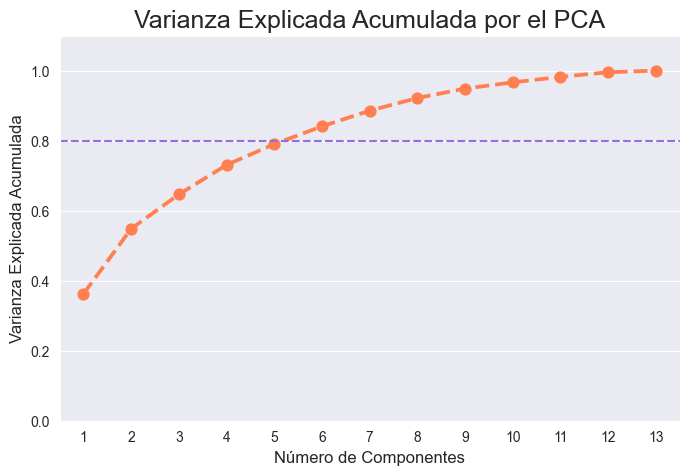

In [87]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.pointplot(x=range(1, len(explained)+1), y=cumulative, markers='o', linestyles='--', color="coral")
plt.title('Varianza Explicada Acumulada por el PCA', fontsize=18)
plt.xlabel('Número de Componentes', fontsize=12)
plt.ylabel('Varianza Explicada Acumulada', fontsize=12)
plt.axhline(y=0.8, color='mediumpurple', linestyle='--')
plt.ylim(0, 1.1)
plt.show()

In [69]:
pca = PCA(n_components=6)
df_ss_pca = pd.DataFrame(data=pca.fit_transform(df_ss), columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"])
df_ss_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.164672,-0.803202,-1.025820,0.282816,0.014760,0.472629
1,-4.436239,-1.987863,-1.349363,-0.267252,0.598739,0.754170
2,-3.843192,1.914272,0.351344,-1.291032,-0.564044,-0.216747
3,-3.791167,1.602657,0.900057,-1.082825,-0.050485,-0.877389
4,-3.496826,2.692341,1.287733,-0.559267,0.181786,-1.055199


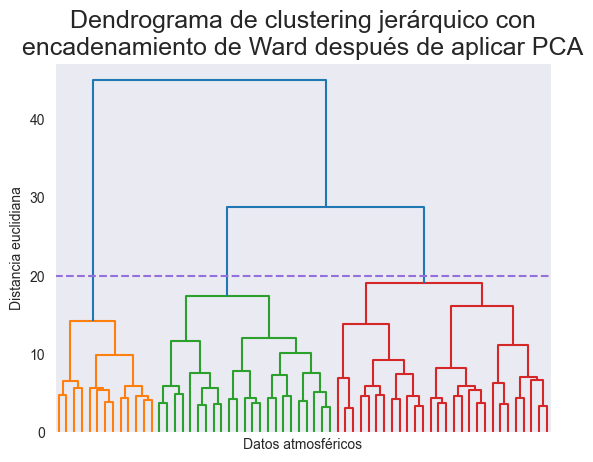

In [73]:
sns.set_style("dark")
Z = linkage(df_ss_pca, method="ward", metric='euclidean')
fig, ax = plt.subplots()
plt.title("Dendrograma de clustering jerárquico con\nencadenamiento de Ward después de aplicar PCA", fontsize=18)
dendrogram(Z, p=64, truncate_mode="lastp", color_threshold=20, no_labels=True)
plt.axhline(y=20, color='mediumpurple', linestyle='--')
ax.set_ylabel("Distancia euclidiana")
ax.set_xlabel("Datos atmosféricos")
plt.show()

In [74]:
clustering_jerarquico_pca = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(df_ss_pca)

In [75]:
clustering_jerarquico_pca.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,

In [77]:
print("Métricas de Silhouette")
print(f"Jerárquico con 9 clusters: {round(silhouette_score(df_ss.values, clustering_jerarquico1.labels_), 2)}")
print(f"Jerárquico con 3 clusters: {round(silhouette_score(df_ss.values, clustering_jerarquico2.labels_), 2)}")
print(f"KMedoids con 3 clusters: {round(silhouette_score(df_ss.values, clustering_KMedoids_3.labels_), 2)}")
print(f"KMedoids con 2 clusters: {round(silhouette_score(df_ss.values, clustering_KMedoids_2.labels_), 2)}")
print(f"DBSCAN con 2 clusters y outliers: {round(silhouette_score(df_ss.values, model_density.labels_), 2)}")
print(f"Jerárquico con 3 clusters PCA: {round(silhouette_score(df_ss_pca.values, clustering_jerarquico_pca.labels_), 2)}")

Métricas de Silhouette
Jerárquico con 9 clusters: 0.14
Jerárquico con 3 clusters: 0.21
KMedoids con 3 clusters: 0.2
KMedoids con 2 clusters: 0.25
DBSCAN con 2 clusters y outliers: 0.1
Jerárquico con 3 clusters PCA: 0.24


In [78]:
df1["Clustering Jerarquico 3 PCA"] = clustering_jerarquico_pca.labels_
df1.head()

,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot,Clustering Jerarquico 9,Clustering Jerarquico 3,Clustering KMedoids 2,Clustering KMedoids 3,Clustering DBSCAN 2,Clustering Jerarquico 3 PCA
0,42.098597,2.377042,0.378701,0.269903,32.476493,20.131194,19.830514,29.753889,2.439608,154.966895,804.314569,630.264466,0.0,4,1,1,1,1,1
1,44.560389,1.889646,0.215486,0.244556,28.960708,18.765649,20.916111,27.642535,2.883990,231.153622,803.925649,659.373538,0.0,1,1,1,1,1,1
2,50.777618,4.491722,0.745514,0.397743,49.597222,35.021854,21.357729,30.954847,1.604234,178.251752,803.767500,485.725435,0.0,1,1,1,1,1,1
3,50.881806,4.101944,0.455646,0.384681,48.555437,35.872396,21.968729,35.661208,1.729689,183.150144,804.870299,422.336301,0.0,1,1,1,1,1,1
4,52.673167,4.675542,0.458521,0.442660,52.817632,41.230729,21.668757,42.649750,1.900280,137.419527,805.930109,449.436559,0.2,1,1,1,1,1,1


In [ ]:
modelos.append(clustering_jerarquico_pca)


In [80]:
modelos

[AgglomerativeClustering(n_clusters=9),
 AgglomerativeClustering(n_clusters=3),
 KMedoids(metric='euclidean', n_clusters=3),
 KMedoids(metric='euclidean', n_clusters=2),
 DBSCAN(eps=2, min_samples=8),
 AgglomerativeClustering(n_clusters=3)]

In [81]:
mapeo = {0: "Clustering Jerárquico 9",
         1: "Clustering Jerárquico 3",
         2: "Clustering KMedoids 3",
         3: "Clustering KMedoids 2",
         4: "Clustering DBSCAN 2 y outliers",
         5: "Clustering Jerárquico 3 PCA"}

In [83]:
print("Información mutua normalizada")
for i, m1 in enumerate(modelos):
    for j, m2 in enumerate(modelos[i+1:], start=i+1):
        print(f"{mapeo[i]} con {mapeo[j]}: {round(normalized_mutual_info_score(m1.labels_, m2.labels_), 2)}")

Información mutua normalizada
Clustering Jerárquico 9 con Clustering Jerárquico 3: 0.67
Clustering Jerárquico 9 con Clustering KMedoids 3: 0.41
Clustering Jerárquico 9 con Clustering KMedoids 2: 0.37
Clustering Jerárquico 9 con Clustering DBSCAN 2 y outliers: 0.36
Clustering Jerárquico 9 con Clustering Jerárquico 3 PCA: 0.44
Clustering Jerárquico 3 con Clustering KMedoids 3: 0.5
Clustering Jerárquico 3 con Clustering KMedoids 2: 0.58
Clustering Jerárquico 3 con Clustering DBSCAN 2 y outliers: 0.46
Clustering Jerárquico 3 con Clustering Jerárquico 3 PCA: 0.52
Clustering KMedoids 3 con Clustering KMedoids 2: 0.53
Clustering KMedoids 3 con Clustering DBSCAN 2 y outliers: 0.4
Clustering KMedoids 3 con Clustering Jerárquico 3 PCA: 0.54
Clustering KMedoids 2 con Clustering DBSCAN 2 y outliers: 0.48
Clustering KMedoids 2 con Clustering Jerárquico 3 PCA: 0.54
Clustering DBSCAN 2 y outliers con Clustering Jerárquico 3 PCA: 0.36


In [88]:
normalized_mutual_info_score(modelos[0].labels_, modelos[0].labels_)

np.float64(1.0)